<a href="https://colab.research.google.com/github/ArtyomHov/tensorflow-zero-to-mastery/blob/master/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convolutional neural networks and computer vision with tensorflow

Computer vision is a practice of writing algorithms which then can discover patterns in vusal data. Such as the camera of self driving car recognizing the car in front.

## Get the data

The images we are working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification book.

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [46]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-06-25 18:03:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  23.5MB/s    in 5.5s    

2024-06-25 18:03:20 (18.9 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.
And for a computer vision project... this usualy means visualizing many samples of your data.

In [47]:
!ls pizza_steak

test  train


In [48]:
!ls pizza_steak/train

pizza  steak


In [49]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [50]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'


In [51]:
# Another way to find how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [52]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class names from the subdirectories
print(class_names)

['pizza' 'steak']


In [53]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'' view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}") # Show the shape of image

  return img

Image shape: (512, 512, 3)


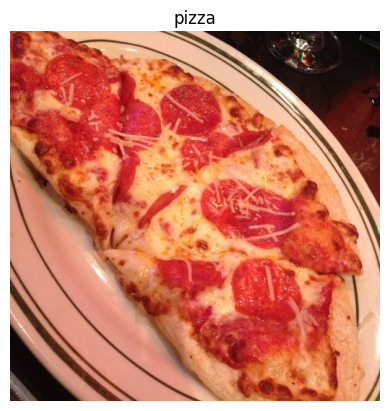

In [54]:
# View a random image from the training dataset
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class='pizza')

In [55]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[184,  71,  31],
        [179,  67,  29],
        [182,  69,  35],
        ...,
        [ 14,  10,   9],
        [ 14,  10,   9],
        [ 15,  11,  10]],

       [[165,  52,  12],
        [168,  56,  18],
        [167,  54,  22],
        ...,
        [ 14,  10,   9],
        [ 13,   9,   8],
        [ 12,   8,   7]],

       [[166,  52,  15],
        [169,  57,  20],
        [163,  50,  20],
        ...,
        [ 11,  10,   8],
        [ 12,   8,   7],
        [ 11,   7,   6]],

       ...,

       [[ 58,  23,  21],
        [ 60,  25,  23],
        [ 60,  25,  23],
        ...,
        [ 67,  79,  31],
        [ 81, 104,  52],
        [ 82, 111,  57]],

       [[ 60,  22,  21],
        [ 63,  25,  24],
        [ 64,  26,  25],
        ...,
        [ 71,  98,  45],
        [ 79, 118,  63],
        [ 88, 133,  76]],

       [[ 61,  23,  22],
        [ 60,  22,  21],
        [ 61,  23,  22],
        ...,
        [ 68, 101,  4

In [56]:
# View the image shape
img.shape # Returns the width, height, color channels

(512, 512, 3)

In [57]:
# Get all the pixel values between 0 & 1
img / 255

array([[[0.72156863, 0.27843137, 0.12156863],
        [0.70196078, 0.2627451 , 0.11372549],
        [0.71372549, 0.27058824, 0.1372549 ],
        ...,
        [0.05490196, 0.03921569, 0.03529412],
        [0.05490196, 0.03921569, 0.03529412],
        [0.05882353, 0.04313725, 0.03921569]],

       [[0.64705882, 0.20392157, 0.04705882],
        [0.65882353, 0.21960784, 0.07058824],
        [0.65490196, 0.21176471, 0.08627451],
        ...,
        [0.05490196, 0.03921569, 0.03529412],
        [0.05098039, 0.03529412, 0.03137255],
        [0.04705882, 0.03137255, 0.02745098]],

       [[0.65098039, 0.20392157, 0.05882353],
        [0.6627451 , 0.22352941, 0.07843137],
        [0.63921569, 0.19607843, 0.07843137],
        ...,
        [0.04313725, 0.03921569, 0.03137255],
        [0.04705882, 0.03137255, 0.02745098],
        [0.04313725, 0.02745098, 0.02352941]],

       ...,

       [[0.22745098, 0.09019608, 0.08235294],
        [0.23529412, 0.09803922, 0.09019608],
        [0.23529412, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our image, more specifically we need a way to:

* Load out images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [58]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of pixel vcalues between 0 & 1, this is also called normalization)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode='binary',
                                                seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 8s 125ms/step - loss: 0.5976 - accuracy: 0.6580 - val_loss: 0.4226 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 7s 152ms/step - loss: 0.4471 - accuracy: 0.7973 - val_loss: 0.4458 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4128 - accuracy: 0.8167 - val_loss: 0.3529 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4077 - accuracy: 0.8173 - val_loss: 0.3813 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3504 - accuracy: 0.8473 - val_loss: 0.3271 - val_accuracy: 0.8500


In [59]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the tensorflow background.

In [60]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 127ms/step - loss: 1.3045 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 153ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.4733 - val_loss: 0.6931 - val_accuracy: 0.5000


In [61]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_11 (Dense)            (None, 4)                 602116    
                                                                 
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly. Let's improve it.

In [62]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 131ms/step - loss: 2.9167 - accuracy: 0.6267 - val_loss: 0.9131 - val_accuracy: 0.6220
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 0.8348 - accuracy: 0.6887 - val_loss: 1.7075 - val_accuracy: 0.6260
Epoch 3/5
47/47 [==============================] - 6s 116ms/step - loss: 1.4242 - accuracy: 0.6740 - val_loss: 0.7737 - val_accuracy: 0.7080
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6830 - accuracy: 0.7360 - val_loss: 0.4917 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6745 - accuracy: 0.7293 - val_loss: 0.5549 - val_accuracy: 0.7240


In [63]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 100)               15052900  
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary classification; Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normallizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment)


### 1.Become one with data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


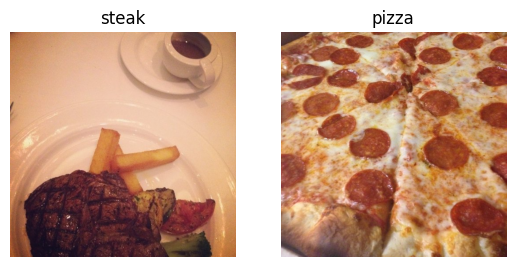

In [64]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizz_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare for a model)

In [65]:
# Define directory dataset apths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is small subset of data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1.  10000 images (or more) might not fit into your processor (GPU)
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.


In [66]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [67]:
# load in our image data from directories and turn that into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images
                                               class_mode='binary', # Type of data you are working with
                                               batch_size=32) # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [68]:
# get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/train data
len(images), len(labels)

(32, 32)

In [69]:
# How many batches are there?
len(train_data)

47

In [70]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [71]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with baseline)

A baseline is relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field of your problem)

In [72]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [73]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding window going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window take accross the input
           padding='valid', # if 'same'. output shape is same as input shape, if 'valid', output shape gets compressed
           activation='relu',
           input_shape=(224, 224, 3) # specifies the input shape
    ),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output lkayer (working with binary classification so only 1 output neuron)
])

In [74]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit the model

In [75]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [76]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 121ms/step - loss: 0.7437 - accuracy: 0.5720 - val_loss: 0.6799 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 7s 147ms/step - loss: 0.5458 - accuracy: 0.7320 - val_loss: 0.5577 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3885 - accuracy: 0.8333 - val_loss: 0.4053 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 6s 138ms/step - loss: 0.2365 - accuracy: 0.9100 - val_loss: 0.4571 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.1309 - accuracy: 0.9647 - val_loss: 0.4534 - val_accuracy: 0.8020


In [77]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 89ms/step - loss: 0.3271 - accuracy: 0.8500


[0.3271273374557495, 0.8500000238418579]

In [78]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

### 5. Evaluating our model

It looks like our model is learning something. Let's evaluate it.

<Axes: >

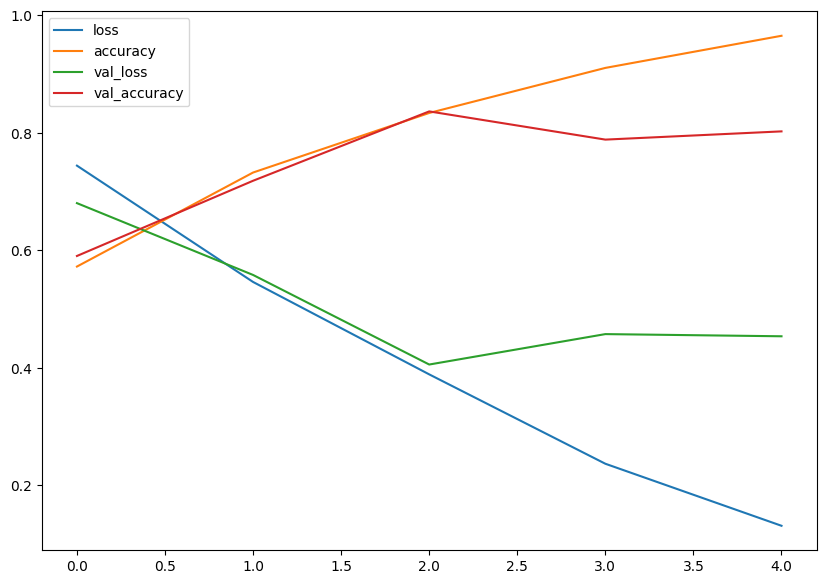

In [79]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [80]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation matrix
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

**Note** When a model's validation loss starts to increase it's likely the model is **overfitting** the training dataset. This means it learns the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

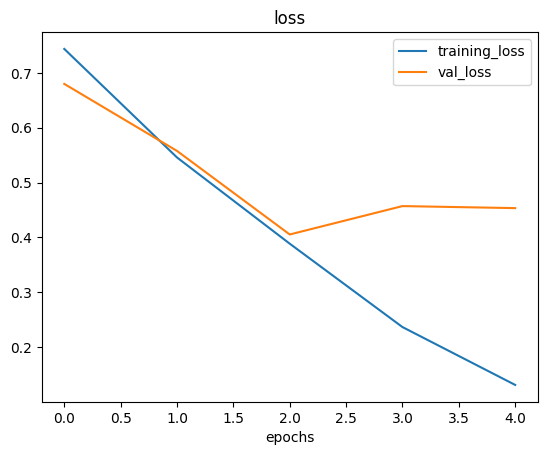

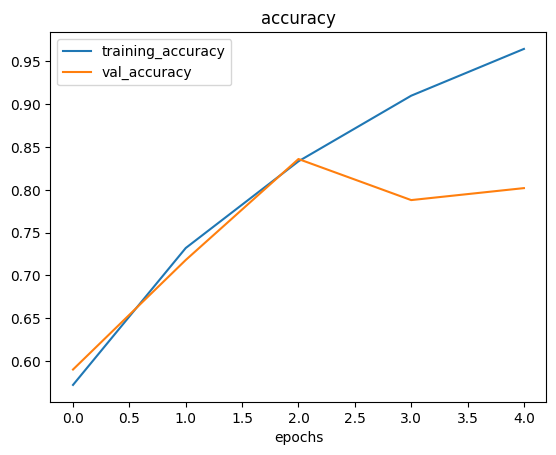

In [81]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to injuce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regulisation layers (such as MaxPool2D)
* Add more data...

**Note** Reducing overfitting is also known as regularization.

In [82]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
 ])

In [83]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [84]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 136ms/step - loss: 0.6629 - accuracy: 0.6167 - val_loss: 0.5586 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.5067 - accuracy: 0.7687 - val_loss: 0.4237 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4297 - accuracy: 0.8127 - val_loss: 0.3786 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3916 - accuracy: 0.8293 - val_loss: 0.3745 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3630 - accuracy: 0.8393 - val_loss: 0.3718 - val_accuracy: 0.8220


In [85]:
# Get a summary of our model with max pooling
model_5.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 26, 26, 10)       

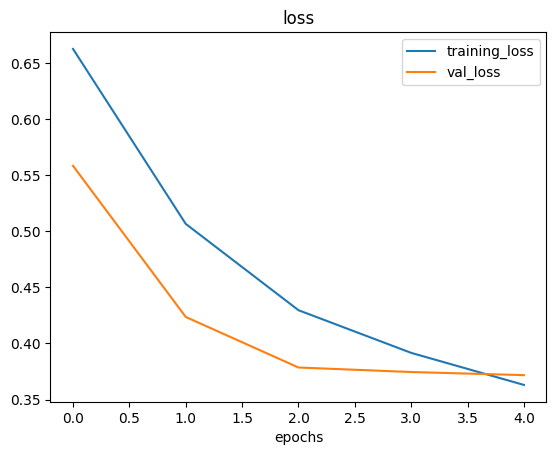

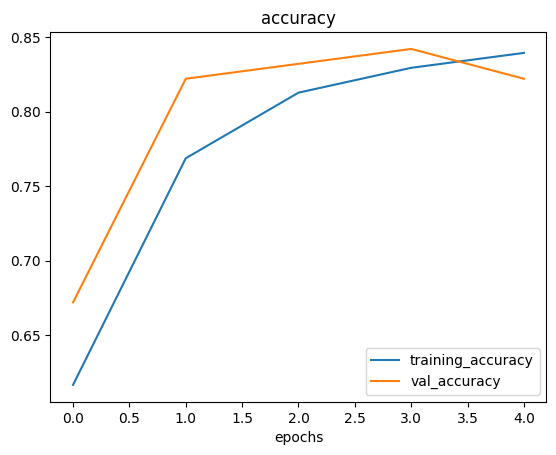

In [86]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [87]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question** What is data augmentation

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping or something similar.

Let's write some code to visualize data augmentation...

In [88]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False # for demonstration purposes only
                                                                   )

# Create non-augmented train data batches
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
IMG_SIZE = (224, 224)
# Create non augmented test data batches
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... Let's visualize some augmented data.

In [89]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented, only images

showing image number: 27


(-0.5, 223.5, 223.5, -0.5)

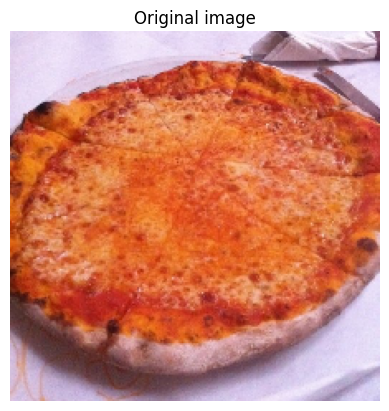

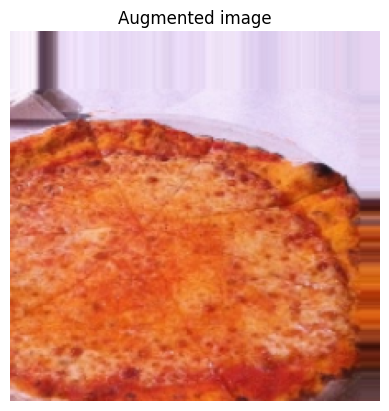

In [90]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [94]:
# Create a model (same as model 5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 32s 650ms/step - loss: 0.7078 - accuracy: 0.4627 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6974 - accuracy: 0.4747 - val_loss: 0.6919 - val_accuracy: 0.5280
Epoch 3/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6937 - accuracy: 0.5060 - val_loss: 0.6910 - val_accuracy: 0.5980
Epoch 4/5
47/47 [==============================] - 23s 484ms/step - loss: 0.6946 - accuracy: 0.5353 - val_loss: 0.6865 - val_accuracy: 0.6220
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6983 - accuracy: 0.5140 - val_loss: 0.6789 - val_accuracy: 0.5000


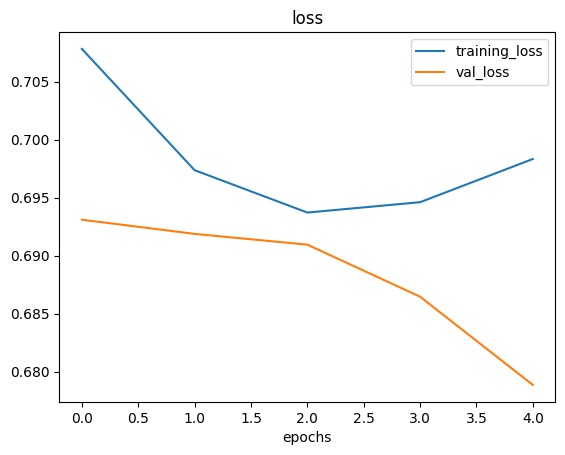

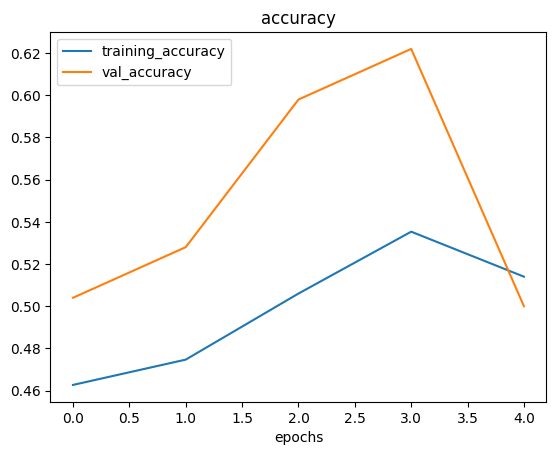

In [97]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [98]:
# import data and augment it and shuffle from training directory

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode='binary',
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [99]:
# Create the model (same as model_5 and model_6)

model_7 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 473ms/step - loss: 0.6732 - accuracy: 0.5647 - val_loss: 0.5615 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 22s 477ms/step - loss: 0.6044 - accuracy: 0.6767 - val_loss: 0.5248 - val_accuracy: 0.7120
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5403 - accuracy: 0.7353 - val_loss: 0.4136 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 29s 632ms/step - loss: 0.5318 - accuracy: 0.7433 - val_loss: 0.3938 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5094 - accuracy: 0.7633 - val_loss: 0.3846 - val_accuracy: 0.8560


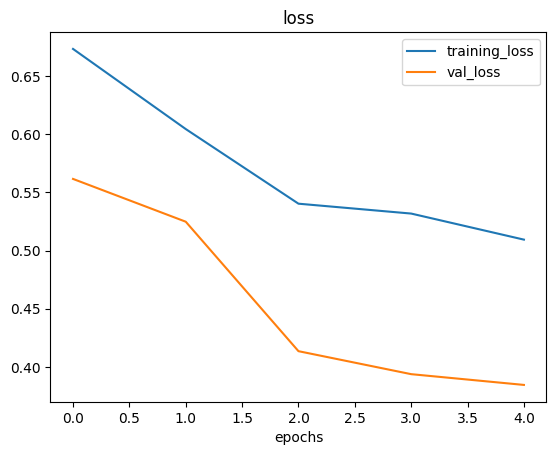

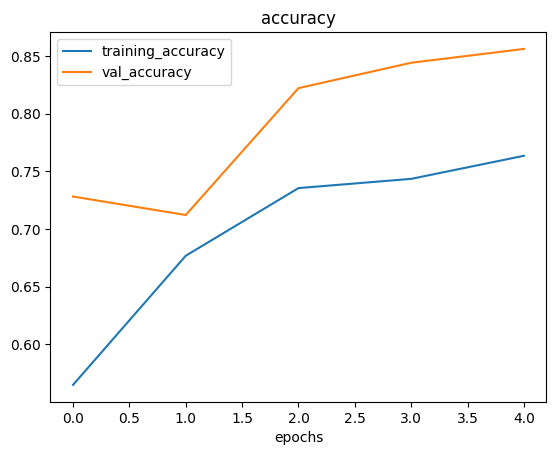

In [100]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)



### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case